global warming is a hoax (period 1985 - 2015) - gets rejected with an alpha = 0.05
Wald's test.
W value - 1.987579

global warming is a hoax (period 1955 - 1985) - gets accepted with an alpa = 0.05
Wald's test
W  0.797305
95% confidence interval 0.070111 to 0.164222


global warming is a hoax (period 1955 - 2015) - gets accepted with an alpa = 0.05
Wald's test
test statistic 0.881784
95% confidence interval 0.182108 to 0.276219


global warming is happening. H0 = 0.4 # source for assuming this - https://earthobservatory.nasa.gov/Features/WorldOfChange/decadaltemp.php
test statistic -0.023025
95% confidence interval 0.348364 to 0.442475

Earth has been around for billions of years and the data being analysed is too small concretely say whether global warming is happening. But the recent acceleration in the temperature increase from 1980 to 2015 is alarming.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import seaborn as sns
import datetime
import math
import scipy

In [2]:
#If period is zero, we analyse 1985 to 2015. If period is 30, we analyse 1955 to 1985 and so on...
period = 0
min_year = 1985 - period
max_year = 2015 - period
avg_start = 1950 - period
avg_end = 1980 - period

In [3]:
#making date column index
data = pd.read_csv("GlobalTemperatures.csv",index_col="dt")

In [4]:
#converting index to datetime type
data.index = pd.to_datetime(data.index)

avg_data = data[(data.index.year>= avg_start) & (data.index.year <=avg_end)]

month_avg = []

#finding average over the 30 year comparison period
for month in range(1,13):
    month_avg.append((avg_data[avg_data.index.month==month].LandAndOceanAverageTemperature.mean()))

In [5]:
#only getting the date above min_year-1 
mask = data.index.year>=min_year-1
data = data[mask]

In [6]:
feature = "LandAndOceanAverageTemperature"
data["TemperatureChange"] = None
for year in range(min_year,max_year+1): 
    mask_cur = data.index.year==year
    #mask_prev = data.index.year==year-10
    #data.loc[mask_cur, "TemperatureChange"] = data.loc[mask_cur,"LandAndOceanAverageTemperature"].values - data.loc[mask_prev,"LandAndOceanAverageTemperature"].values
    data.loc[mask_cur, "TemperatureChange"] = data.loc[mask_cur,"LandAndOceanAverageTemperature"].values - month_avg

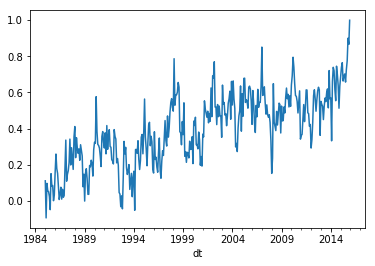

In [7]:
data.TemperatureChange.plot()
plt.show()

In [8]:
#remove prev data used for calculating difference
mask = data.index.year>=min_year
data = data[mask]
data.to_csv("cleanedGlobalTemp.csv")

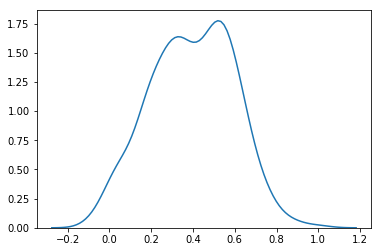

Ks_2sampResult(statistic=0.051397849462365586, pvalue=0.46101436765489373)


In [9]:
sns.kdeplot(data.TemperatureChange.values)
plt.show()

#we are doing wald's test => the estimator should be asymptotically normal. We are checking if our data samples follow normal distribution
#If our data is normal, the MLE of mean is sample mean. Since, MLE is asymptotically normal, we can do wald's test
norm_dist = np.random.normal(loc=data.TemperatureChange.mean(), scale=data.TemperatureChange.std(), size=1000)
print(scipy.stats.ks_2samp(data.TemperatureChange,norm_dist))

In [10]:
#the estimator is asysmptotically normal. (It is an MLE and has to be AN yet we will use KS test once.)
theta_cap_dist = []
for i in range(0,10000):
    theta_cap_dist.append(data.TemperatureChange.sample(frac=0.1, replace=True).mean())
    
theta_cap_dist = pd.Series(theta_cap_dist)
norm_dist = np.random.normal(loc=theta_cap_dist.mean(), scale=theta_cap_dist.std(), size=10000)
print(scipy.stats.ks_2samp(theta_cap_dist,norm_dist))

Ks_2sampResult(statistic=0.013000000000000012, pvalue=0.36463448579373375)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if sys.path[0] == '':


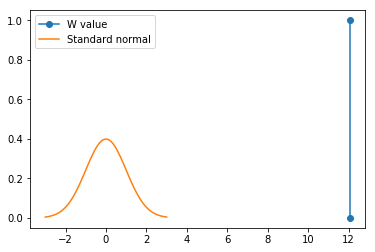

In [11]:
theta_0 = 0
theta_cap = data.TemperatureChange.mean()
se = se_cap = theta_cap_dist.std()
#se = se_not = data.TemperatureChange.std()
w = (theta_cap - theta_0)/se
plt.plot([w,w],[0,1],marker='o',label="W value")

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma),label="Standard normal")
plt.legend()
plt.show()

In [12]:
print("test statistic %f"%w)
print("95%% confidence interval %f to %f"%(theta_cap-1.96*se_cap,theta_cap+1.96*se_cap))

test statistic 12.050287
95% confidence interval 0.331104 to 0.459735


In [13]:
avg_values={}
for year in range(min_year,2016):
    avg_values[year] = data[data.index.year == year].TemperatureChange.mean()
    

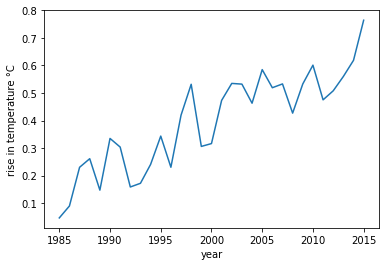

In [14]:
#average increase in temperature compared to mean of temperature bw avg_start and avg_end
years = list(avg_values.keys())
years.sort()
values=[]
for i in years:
    values.append(avg_values[i])

plt.xlabel('year')
plt.ylabel('rise in temperature °C')
plt.plot(years,values)
plt.show()

In [15]:
#similar results different data set - https://climate.nasa.gov/vital-signs/global-temperature/

0.39541935483871
0.03281410383211102


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  app.launch_new_instance()


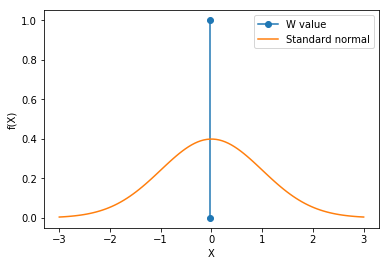

In [16]:
theta_0 = 0.4 # source for assuming this - https://earthobservatory.nasa.gov/Features/WorldOfChange/decadaltemp.php
theta_cap = data.TemperatureChange.mean()
#se = se_cap = theta_cap_dist.std()
se = se_not = data.TemperatureChange.std()
print(theta_cap)
print(se_cap)
w = (theta_cap - theta_0)/se
plt.plot([w,w],[0,1],marker='o',label="W value")

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.xlabel('X')
plt.ylabel('f(X)')
plt.plot(x,mlab.normpdf(x, mu, sigma),label="Standard normal")
plt.legend()
plt.show()

In [17]:
print("test statistic %f"%w)
print("95%% confidence interval %f to %f"%(theta_cap-1.96*se_cap,theta_cap+1.96*se_cap))

test statistic -0.023025
95% confidence interval 0.331104 to 0.459735
